## Prediksi Tingkat Pengangguran Terbuka (TPT) di Provinsi Jawa Barat dengan Metode Backpropagation Optimasi Adam

### Context
- Pengangguran menjadi salah satu tantangan yang dihadapi negara berkembang, termasuk Indonesia.
- Jawa Barat menjadi provinsi yang menempati urutan pertama dengan populasi sekaligus Tingkat Pengangguran Terbuka (TPT) tertinggi di Indonesia.
 - Prediksi yang akurat tentang Tingkat Pengangguran Terbuka (TPT) akan menjadi alat penting dalam perencanaan dan kebijakan ekonomi yang berorientasi pada tindakan untuk memperbaiki kesejahteraan masyarakat serta menciptakan peluang pekerjaan yang lebih luas.
- Dalam penelitian ini, metode backpropagation dengan optimasi Adam akan diimplementasikan untuk memprediksi TPT Provinsi Jawa Barat.  
 
### Content
a. Teknik Pengumpulan Data
 - Teknik pengumpulan data yang dimanfaatkan pada proses penelitian ini adalah pengumpulan data menggunakan data sekunder atau data statistik.
 - Data sekunder yang digunakan diperoleh dari laman resmi Badan Pusat Statistik (www.bps.go.id) yang diunggah dengan bentuk publikasi dan tabel dinamis yang diakses pada bulan Agustus tahun 2023. 

b. Data Penelitian
- Data yang dimanfaatkan adalah data tentang Tingkat Pengangguran Terbuka (TPT) di Provinsi Jawa Barat dari tahun 1986-2022 beserta variabel lain yang berpotensi memengaruhi nilai TPT.
- Pada tahun 1995, Survei Angkatan Tenaga Kerja Nasional (SAKERNAS) tidak dilaksanakan sama sekali sehingga tidak dilibatkan dalam data penelitian ini.
-  Adapun Informasi data yang dimanfaatkan pada setiap kolom yaitu
    - Tingkat Pengangguran Terbuka (TPT)
    - Tingkat Partisipasi Angkatan Kerja (TPAK)
    - Jumlah angkatan kerja 
    - Pendaftaran pencari kerja 
    - Lowongan kerja terdaftar 
    - Pemenuhan tenaga kerja 
    - Laju pertumbuhan ekonomi 
    - Laju pertumbuhan Produk Domestik dan Bruto (PDRB) 
    - Laju pertumbuhan penduduk
    - Laju inflasi
    - Angka Partisipasi Murni (APM)
    - Indeks Pembangunan Manusia (IPM). 

    


In [1]:
# Melakukan clear session untuk menghapus sesi sebelumnya
import tensorflow as tf
tf.keras.backend.clear_session()

In [2]:
# Melakukan import library yang akan digunakan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [3]:
# Melakukan import dan menampilkan dataset
data = pd.read_csv('data_skripsi_bulanan_2.csv', index_col='Tahun', parse_dates=True)

# Mengonversi indeks menjadi tipe data datetime dan menetapkan frekuensi harian ('D')
data.index = pd.to_datetime(data.index, format='%Y-%m-%d')
data.head(3)

,TPT Jabar,TPAK Jabar,Jumlah Angkatan Kerja Jabar,Pendaftaran Pencari Kerja Jabar,Lowongan Kerja Terdaftar Jabar,Pemenuhan Tenaga Kerja Jabar,Laju Pertumbuhan Ekonomi Indonesia,Laju Pertumbuhan PDRB Jabar,Laju Pertumbuhan Penduduk Jabar,Laju Inflasi Indonesia,Laju Inflasi Bandung,APM Indonesia,IPM Jabar
Tahun,,,,,,,,,,,,,
1986-01-01,9.84,51.98,946633.54,117801.38,16332.62,11886.0,2.08,6.79,2.57,8.84,10.07,5.62,67.18
1986-02-01,9.33,51.97,1882490.08,122177.77,18430.23,13834.0,2.09,6.68,2.57,8.84,9.95,5.64,67.18
1986-03-01,8.82,51.95,2818346.62,126554.15,20527.85,15782.0,2.10,6.56,2.57,8.85,9.83,5.65,67.18


In [4]:
# Menghitung nilai minimum dan maksimum untuk proses normalisasi
min_values_tpt = data['TPT Jabar'].min()
print(f"min_values: {min_values_tpt}")
max_values_tpt = data['TPT Jabar'].max()
print(f"max_values: {max_values_tpt}")

min_values: 3.28
max_values: 15.08


In [5]:
# Menampilkan kolom pada dataframe
data.columns

Index(['TPT Jabar', 'TPAK Jabar', 'Jumlah Angkatan Kerja Jabar',
       'Pendaftaran Pencari Kerja Jabar', 'Lowongan Kerja Terdaftar Jabar',
       'Pemenuhan Tenaga Kerja Jabar', 'Laju Pertumbuhan Ekonomi Indonesia',
       'Laju Pertumbuhan PDRB Jabar', 'Laju Pertumbuhan Penduduk Jabar',
       'Laju Inflasi Indonesia', 'Laju Inflasi Bandung', 'APM Indonesia',
       'IPM Jabar'],
      dtype='object')

In [6]:
# Menentukan kolom yang dinormalisasi
columns_to_normalize = data.columns

# Membuat objek MinMaxScaler untuk normalisasi data
scaler = MinMaxScaler(feature_range=(0, 1))

# Melakukan normalisasi pada kolom yang ditentukan
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

In [7]:
# Menampilkan data
data.head()

,TPT Jabar,TPAK Jabar,Jumlah Angkatan Kerja Jabar,Pendaftaran Pencari Kerja Jabar,Lowongan Kerja Terdaftar Jabar,Pemenuhan Tenaga Kerja Jabar,Laju Pertumbuhan Ekonomi Indonesia,Laju Pertumbuhan PDRB Jabar,Laju Pertumbuhan Penduduk Jabar,Laju Inflasi Indonesia,Laju Inflasi Bandung,APM Indonesia,IPM Jabar
Tahun,,,,,,,,,,,,,
1986-01-01,0.555932,0.064815,0.000000,0.086747,0.027070,0.027357,0.470366,0.915932,1.0,0.100579,0.127212,0.000000,0.289474
1986-02-01,0.512712,0.064270,0.037994,0.090227,0.030859,0.032001,0.471627,0.911894,1.0,0.100579,0.125397,0.001314,0.289474
1986-03-01,0.469492,0.063181,0.075988,0.093706,0.034648,0.036644,0.472888,0.907489,1.0,0.100720,0.123582,0.001971,0.289474
1986-04-01,0.427119,0.062636,0.113983,0.097185,0.038437,0.041288,0.474149,0.903451,1.0,0.100720,0.121767,0.003285,0.288278
1986-05-01,0.383898,0.061547,0.151977,0.100664,0.042225,0.045932,0.476671,0.899413,1.0,0.100862,0.119952,0.003942,0.288278


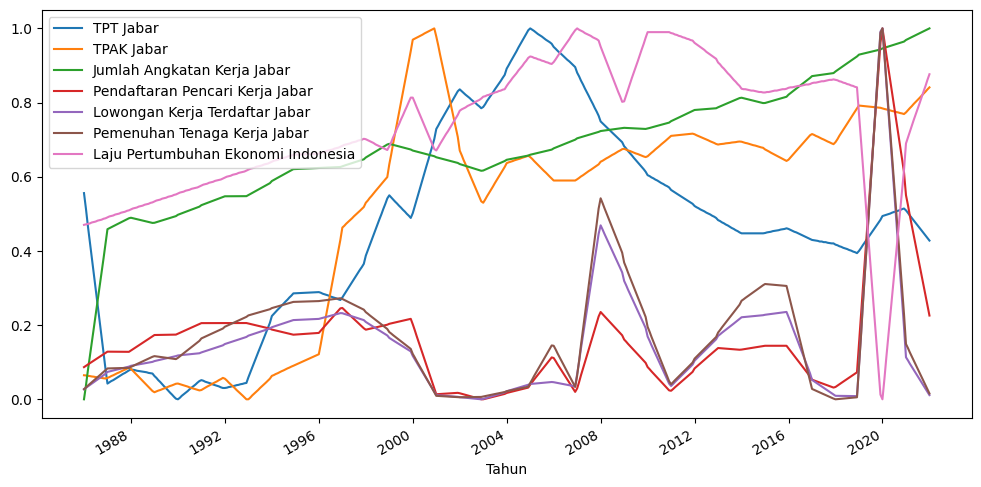

In [8]:
ax = data[['TPT Jabar', 
           'TPAK Jabar', 
           'Jumlah Angkatan Kerja Jabar',
           'Pendaftaran Pencari Kerja Jabar',
           'Lowongan Kerja Terdaftar Jabar',
           'Pemenuhan Tenaga Kerja Jabar',
           'Laju Pertumbuhan Ekonomi Indonesia' 
          ]].plot(figsize=(12,6))

# Mengatur legenda di kiri atas
ax.legend(loc='upper left')

# Menampilkan plot
plt.show()

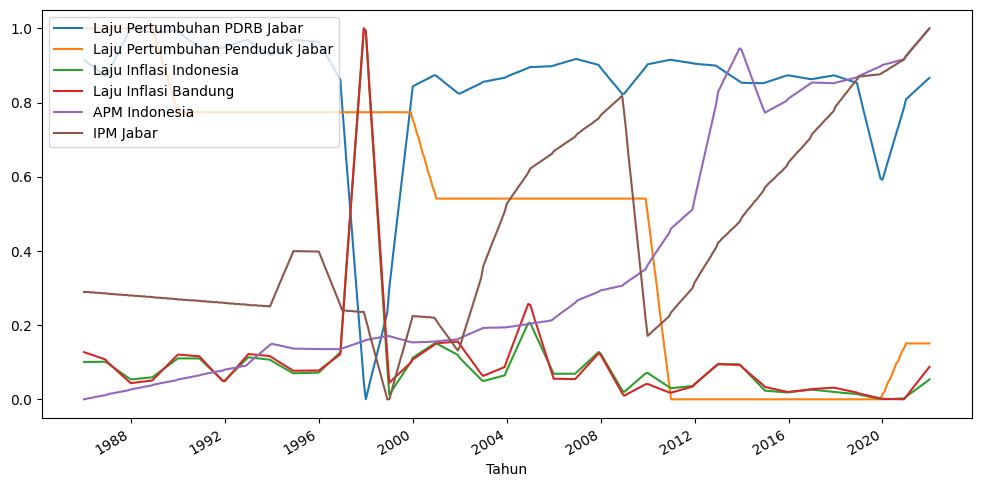

In [9]:
ax = data[[ 
           'Laju Pertumbuhan PDRB Jabar', 
           'Laju Pertumbuhan Penduduk Jabar',
           'Laju Inflasi Indonesia',
           'Laju Inflasi Bandung', 
           'APM Indonesia', 
           'IPM Jabar']].plot(figsize=(12,6))

# Mengatur legenda di kiri atas
ax.legend(loc='upper left')

# Menampilkan plot
plt.show()

<Axes: >

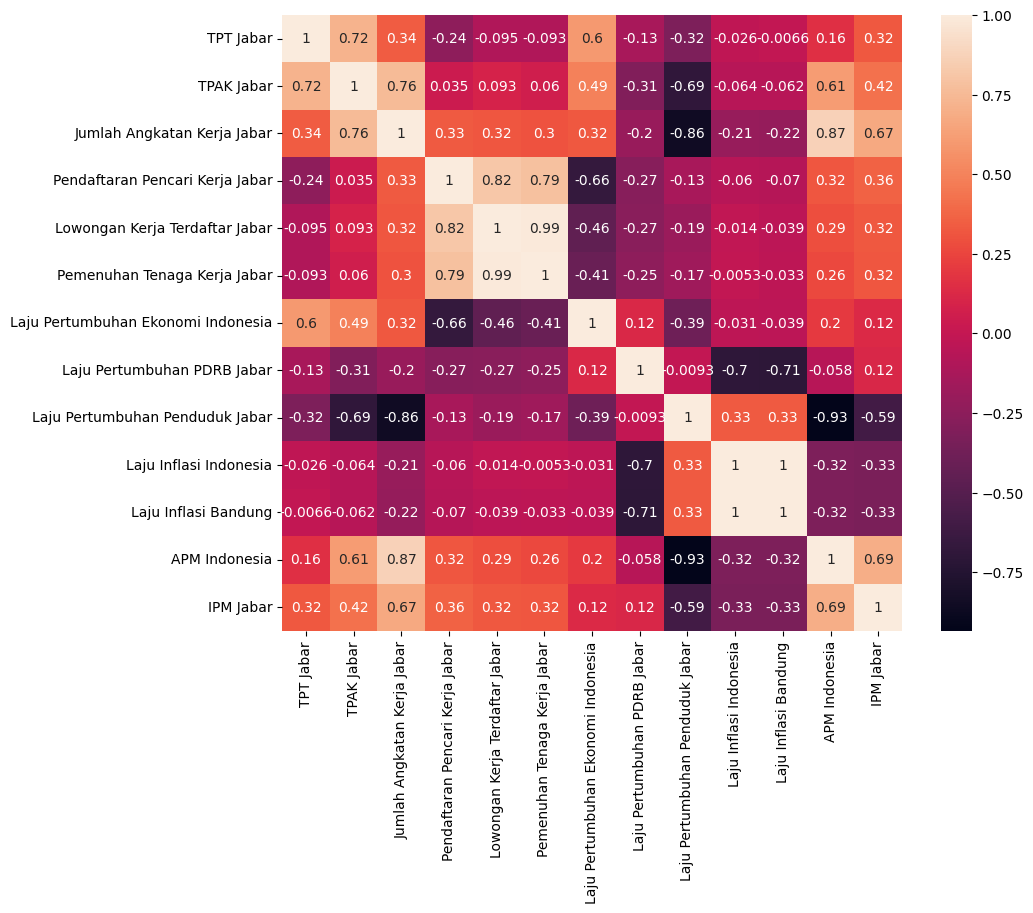

In [10]:
# Menampilkan correlation map untuk menunjukkan korelasi antar variabel
plt.figure(figsize = (10, 8))
sns.heatmap(data.corr(), annot = True)

In [11]:
# Menghapus variabel yang memiliki hubungan yang lemah untuk menyederhanakan model
data = data.drop(columns = {'Laju Pertumbuhan Ekonomi Indonesia',
                            'Laju Pertumbuhan PDRB Jabar',
                            'Laju Pertumbuhan Penduduk Jabar',
                            'Laju Inflasi Indonesia',
                            'Laju Inflasi Bandung'
                            })

<Axes: >

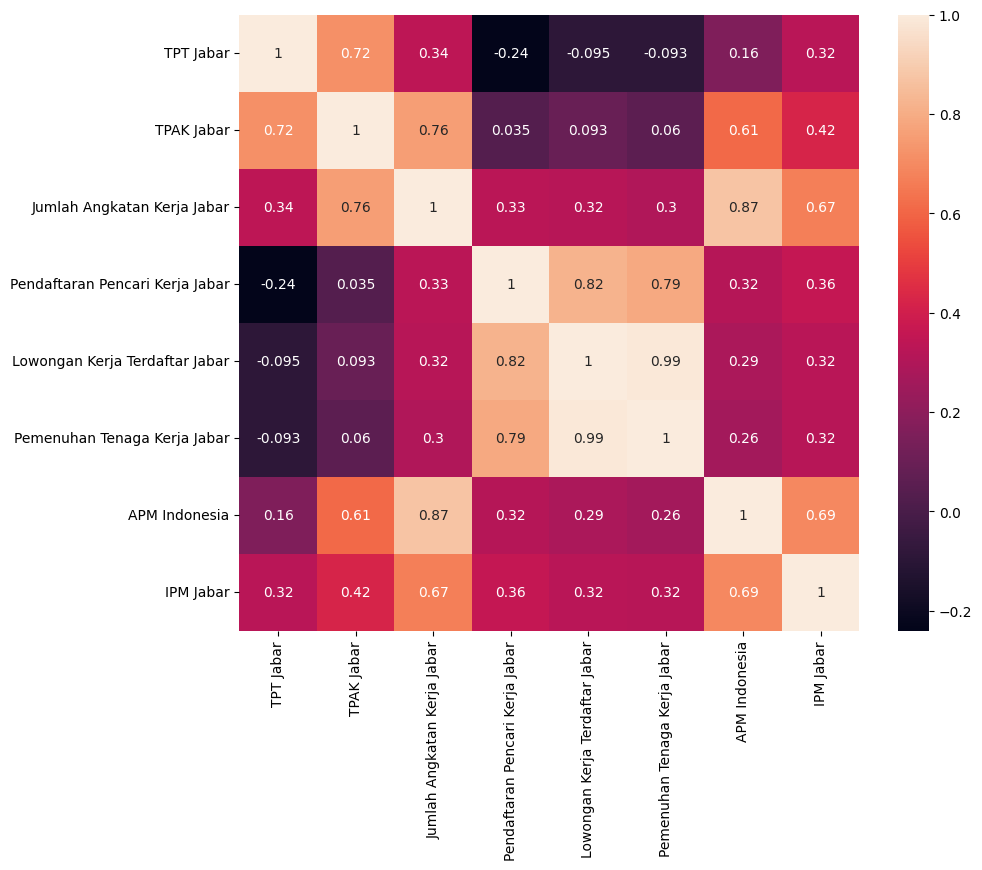

In [12]:
# Menampilkan correlation map untuk menunjukkan korelasi antar variabel setelah penghapusan variabel
plt.figure(figsize = (10, 8))
sns.heatmap(data.corr(), annot = True)

In [13]:
# Preprocessing data
X = data.drop(columns=['TPT Jabar']).values  # Mengambil semua kolom kecuali 'TPT Jabar'
y = data['TPT Jabar'].values.reshape(-1, 1)  # Mengambil kolom 'TPT Jabar'

In [14]:
# split data menjadi data training dan data testing secara sequential
split_data = int(len(data) * 0.7) # 70% untuk training dan 30% untuk testing
X_train = X[:split_data] 
X_test = X[split_data:]
y_train = y[:split_data]
y_test = y[split_data:]

In [15]:
# Membangun model jaringan saraf
model = Sequential()

# Menambahkan layer input dengan jummlah neuron, sesuai dengan jumlah fitur pada X_train
model.add(Dense(2, 
                input_dim=X_train.shape[1], 
                activation='sigmoid'))

# Menambahkan layer output dengan 1 neuron untuk forecasting
model.add(Dense(1, 
                activation='linear'))

In [16]:
# Kompilasi model dengan menggunakan Adam optimizer
optimizer = Adam(learning_rate=0.001) 
model.compile(optimizer=optimizer, loss='mean_squared_error')

In [17]:
# Menentukan parameter pelatihan
epochs = 7000
batch_size = 16

In [18]:
# Melatih model menggunakan data training
training = model.fit(X_train, y_train, 
                     epochs=epochs, 
                     batch_size=batch_size, 
                     verbose=1, )
training

Epoch 1/7000
19/19 [==============================] - 1s 5ms/step - loss: 0.3867
Epoch 2/7000
19/19 [==============================] - 0s 4ms/step - loss: 0.3305
Epoch 3/7000
19/19 [==============================] - 0s 4ms/step - loss: 0.2846
Epoch 4/7000
19/19 [==============================] - 0s 4ms/step - loss: 0.2448
Epoch 5/7000
19/19 [==============================] - 0s 4ms/step - loss: 0.2132
Epoch 6/7000
19/19 [==============================] - 0s 4ms/step - loss: 0.1881
Epoch 7/7000
19/19 [==============================] - 0s 4ms/step - loss: 0.1670
Epoch 8/7000
19/19 [==============================] - 0s 10ms/step - loss: 0.1514
Epoch 9/7000
19/19 [==============================] - 0s 6ms/step - loss: 0.1395
Epoch 10/7000
19/19 [==============================] - 0s 4ms/step - loss: 0.1303
Epoch 11/7000
19/19 [==============================] - 0s 4ms/step - loss: 0.1234
Epoch 12/7000
19/19 [==============================] - 0s 4ms/step - loss: 0.1184
Epoch 13/7000
19/19 [===

In [19]:
# Evaluasi model dengan data uji
loss = model.evaluate(X_test, y_test, 
                      verbose=0)
print(f"Loss pada data uji: {loss}")

Loss pada data uji: 0.0017156688263639808


In [20]:
# Menggunakan data testing untuk menguji model
y_pred = model.predict(X_test)
y_pred

4/4 [==============================] - 0s 10ms/step


array([[0.5457954 ],
       [0.54299223],
       [0.5402378 ],
       [0.5375311 ],
       [0.5348716 ],
       [0.5322587 ],
       [0.51998734],
       [0.51067543],
       [0.5021964 ],
       [0.4941911 ],
       [0.48686388],
       [0.48001713],
       [0.4734729 ],
       [0.46758237],
       [0.46214345],
       [0.45701635],
       [0.45233083],
       [0.44788742],
       [0.4423485 ],
       [0.44084597],
       [0.43946594],
       [0.4379678 ],
       [0.43660343],
       [0.4352966 ],
       [0.43408307],
       [0.43284196],
       [0.4316534 ],
       [0.43041855],
       [0.42934015],
       [0.4282622 ],
       [0.42939982],
       [0.43179274],
       [0.4343008 ],
       [0.43692267],
       [0.43978173],
       [0.44283566],
       [0.4461656 ],
       [0.4496333 ],
       [0.45335463],
       [0.45726258],
       [0.46149608],
       [0.46608174],
       [0.47042087],
       [0.4697665 ],
       [0.46939132],
       [0.4687717 ],
       [0.46830338],
       [0.467

In [21]:
# Denormalisasi hasil prediksi (y_pred) dan data uji (y_test)
y_pred_denormalized = y_pred * (max_values_tpt - min_values_tpt) + min_values_tpt
print(f"y_pred_denormalized: {y_pred_denormalized}")

y_pred_denormalized: [[9.720386 ]
 [9.687308 ]
 [9.654806 ]
 [9.622867 ]
 [9.591485 ]
 [9.560653 ]
 [9.415851 ]
 [9.30597  ]
 [9.205917 ]
 [9.111455 ]
 [9.024994 ]
 [8.944202 ]
 [8.866981 ]
 [8.797472 ]
 [8.733293 ]
 [8.672793 ]
 [8.617504 ]
 [8.565072 ]
 [8.499713 ]
 [8.481982 ]
 [8.465698 ]
 [8.44802  ]
 [8.43192  ]
 [8.4165   ]
 [8.402181 ]
 [8.387535 ]
 [8.37351  ]
 [8.358939 ]
 [8.346214 ]
 [8.333494 ]
 [8.346918 ]
 [8.3751545]
 [8.40475  ]
 [8.435688 ]
 [8.469424 ]
 [8.505461 ]
 [8.544754 ]
 [8.585673 ]
 [8.629584 ]
 [8.675698 ]
 [8.725654 ]
 [8.779764 ]
 [8.830966 ]
 [8.823245 ]
 [8.818817 ]
 [8.811506 ]
 [8.80598  ]
 [8.800488 ]
 [8.794162 ]
 [8.788743 ]
 [8.783357 ]
 [8.776332 ]
 [8.772132 ]
 [8.764907 ]
 [8.747796 ]
 [8.734215 ]
 [8.722693 ]
 [8.709517 ]
 [8.698339 ]
 [8.685558 ]
 [8.673738 ]
 [8.661359 ]
 [8.65086  ]
 [8.638859 ]
 [8.628678 ]
 [8.6170435]
 [8.615761 ]
 [8.6233   ]
 [8.633728 ]
 [8.642404 ]
 [8.65049  ]
 [8.659628 ]
 [8.670347 ]
 [8.679739 ]
 [8.6882515]
 [8.

In [22]:
y_test_denormalized = y_test * (max_values_tpt - min_values_tpt) + min_values_tpt
print(f"y_test_denormalized: {y_test_denormalized}")

y_test_denormalized: [[9.7 ]
 [9.66]
 [9.62]
 [9.58]
 [9.54]
 [9.5 ]
 [9.43]
 [9.39]
 [9.36]
 [9.32]
 [9.29]
 [9.26]
 [9.22]
 [9.19]
 [9.16]
 [9.12]
 [9.09]
 [9.05]
 [8.98]
 [8.95]
 [8.91]
 [8.88]
 [8.84]
 [8.81]
 [8.77]
 [8.73]
 [8.7 ]
 [8.66]
 [8.63]
 [8.59]
 [8.56]
 [8.56]
 [8.56]
 [8.56]
 [8.56]
 [8.56]
 [8.56]
 [8.56]
 [8.56]
 [8.56]
 [8.56]
 [8.56]
 [8.57]
 [8.59]
 [8.6 ]
 [8.61]
 [8.63]
 [8.64]
 [8.65]
 [8.66]
 [8.68]
 [8.69]
 [8.7 ]
 [8.72]
 [8.7 ]
 [8.67]
 [8.64]
 [8.61]
 [8.59]
 [8.56]
 [8.53]
 [8.5 ]
 [8.47]
 [8.44]
 [8.41]
 [8.38]
 [8.35]
 [8.34]
 [8.33]
 [8.32]
 [8.3 ]
 [8.3 ]
 [8.28]
 [8.28]
 [8.26]
 [8.25]
 [8.24]
 [8.24]
 [8.2 ]
 [8.18]
 [8.15]
 [8.13]
 [8.1 ]
 [8.08]
 [8.06]
 [8.03]
 [8.01]
 [7.98]
 [7.96]
 [7.93]
 [8.  ]
 [8.09]
 [8.18]
 [8.27]
 [8.36]
 [8.45]
 [8.54]
 [8.63]
 [8.72]
 [8.81]
 [8.9 ]
 [8.99]
 [9.11]
 [9.13]
 [9.15]
 [9.17]
 [9.19]
 [9.22]
 [9.24]
 [9.26]
 [9.28]
 [9.3 ]
 [9.33]
 [9.35]
 [9.29]
 [9.21]
 [9.13]
 [9.05]
 [8.97]
 [8.89]
 [8.81]
 [8.73]
 [8

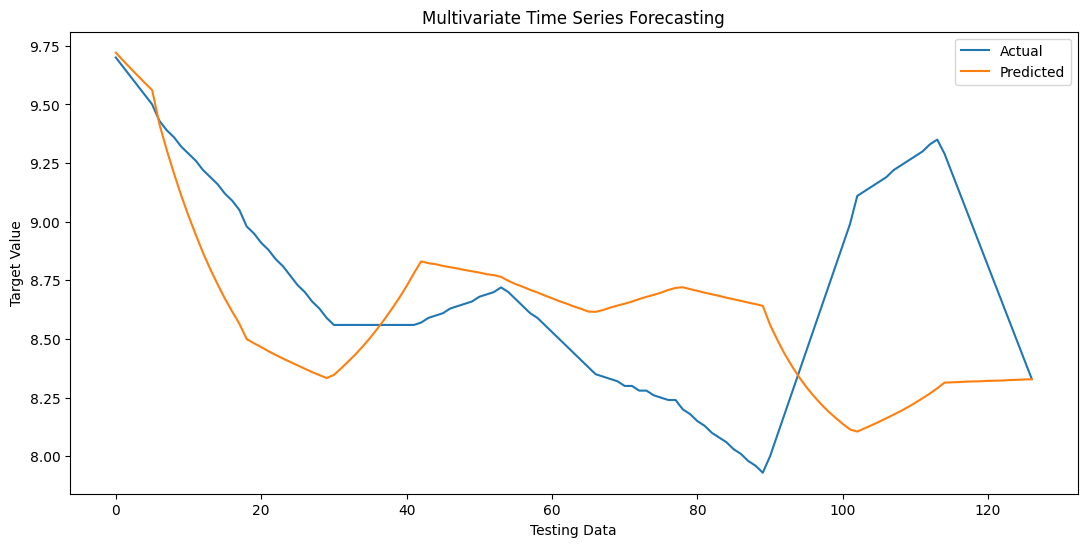

In [23]:
import matplotlib.pyplot as plt
# Plot actual and predicted values
plt.figure(figsize=(13, 6)) 

# Plot actual values
plt.plot(y_test_denormalized, label="Actual")

# Plot predicted values 
plt.plot(y_pred_denormalized, label="Predicted")

plt.title("Multivariate Time Series Forecasting")
plt.xlabel("Testing Data")
plt.ylabel("Target Value")
plt.legend()

In [24]:
# Hitung Mean Squared Error pada data uji setelah denormalisasi
mse_denormalized = mean_squared_error(y_test_denormalized, 
                                      y_pred_denormalized)
print(f"Mean Squared Error pada data uji setelah denormalisasi: {mse_denormalized}")

Mean Squared Error pada data uji setelah denormalisasi: 0.23888966068164583


In [25]:
# Mengukur akurasi model dengan MAPE
mape = np.mean(np.abs((y_test_denormalized - y_pred_denormalized) / y_test_denormalized))*100
mape

4.41042170790012

### Hasil dan Pengujian 
- Berikut ini merupakan hasil yang paling optimal setelah melakukan percobaan dengan menggunakan berbagai parameter yang berbeda
    - 5.375919222617724
    - 4.997541006198482
    - 4.409002111347218
    - 5.320218949582676
    - 4.242416777296679
    - 5.4593298464340725
    - 5.73652365250806
    - 4.723686340764188
    - 6.016523110970751
    - 5.514554560490435

### Analisis Pengujian
- Dari hasil pengujian yang telah didapatkan, nilai MAPE konsisten berada di rentang 4-6 dengan rata-rata 5.179571558. Nilai MAPE yang konsisten menunjukkan bahwa metode tersebut tidak terlalu sensitif terhadap perubahan data. Hal ini penting karena data TPT bisa mengalami perubahan dari waktu ke waktu.
- Menurut Lewis (1982), interpretasi nilai MAPE atau target MAPE terbagi menjadi 4 kategori.
    - MAPE: <10%        --> Sangat baik
    - MAPE: 10% - 19%   --> Baik
    - MAPE: 20% - 49%   --> Wajar
    - MAPE: ≥50%        --> Tidak 

### Kesimpulan
- Dalam penelitian ini, metode backpropagation dengan optimasi Adam diimplementasikan untuk memprediksi TPT Provinsi Jawa Barat. Backpropagation merujuk pada metode yang efektif digunakan untuk melakukan prediksi, sedangkan optimasi Adam akan digunakan sebagai solusi untuk mengatasi masalah learning speed yang lambat dalam metode backpropagation. Hasil penelitian menunjukkan bahwa metode backpropagation dengan optimasi Adam dapat diimplementasikan untuk memprediksi TPT di Provinsi Jawa Barat dengan nilai MAPE yang rendah. Nilai MAPE terendah diperoleh pada penerapan parameter jumlah neuron hidden layer sebanyak 2, nilai learning rate 0.001, jumlah epoch 7000, proporsi data training 70%, dan nilai batch size 16 dengan rata-rata nilai MAPE sebesar 5.179571558 sehingga dapat disimpulkan bahwa performa metode Backpropagation dengan optimasi Adam sangat baik digunakan pada proses prediksi data ini.

Referensi
- Lewis, C. (1982). Industrial and Business Forecasting Methods. London:
Butterworth Scientific.
